In [1]:
# REGRESSION PROBLEM: PREDICT FUEL EFFICIENCY
# Dataset: https://archive.ics.uci.edu/ml/datasets/auto+mpg
# (The data concerns city-cycle fuel consumption in miles per gallon,
# to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.)

from __future__ import absolute_import, division, print_function, unicode_literals

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Import helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Object-oriented filesystem paths library
import pathlib

print(tf.__version__)


2.0.0-rc0


In [2]:
### Load the dataset

# Downloads a file from a URL if it not already in the cache.
dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [3]:
features = ['MPG','Cylinders','Displacement','Horsepower','Weight',
            'Acceleration', 'Model Year', 'Origin'] # MPF meand Miles per galon

# Create a dataframe
original_dataset = pd.read_csv(dataset_path,
                            names = features, # Columns
                            na_values = '?', # Additional string to recognize as NA
                            comment = '\t', # Indicates remainder of line should not be parsed
                            sep = ' ', # Delimiter to use
                            skipinitialspace = True # Skip spaces after delimiter
                           ) 

# Work on a copy of the original dataset
dataset = original_dataset.copy()
dataset.head() # Get the first 5 values of the dataframe

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
# Display a description of the dataset
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
### Clean the data

# Check for NA values in each column/feature
# isna() return a boolean dataframe: True is the value is NA
# sum() count the number of 'True' in each column
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
# Let's drop the entries with NA values
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
# Feature 'Origin' is categorical (3 classes ),
# let's replace it by 3 new features, one for each class
# 1 -> 'USA' // 2 -> 'Europe' // 3 -> 'Japan'

# Get and drop the 'Origin' column
origin = dataset.pop('Origin')
print(origin.head())

print('-'* 50)
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
print(dataset.head())

0    1
1    1
2    1
3    1
4    1
Name: Origin, dtype: int64
--------------------------------------------------
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  USA  Europe  Japan  
0          70  1.0     0.0    0.0  
1          70  1.0     0.0    0.0  
2          70  1.0     0.0    0.0  
3          70  1.0     0.0    0.0  
4          70  1.0     0.0    0.0  


In [8]:
### Split the data into train/test sets 
# 80/20 split

# pandas.sample(): Return a random sample of items
X_train = dataset.sample(frac=0.8, random_state=0)
X_test = dataset.drop(X_train.index) 

/Users/nicolas/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x396 with 0 Axes>

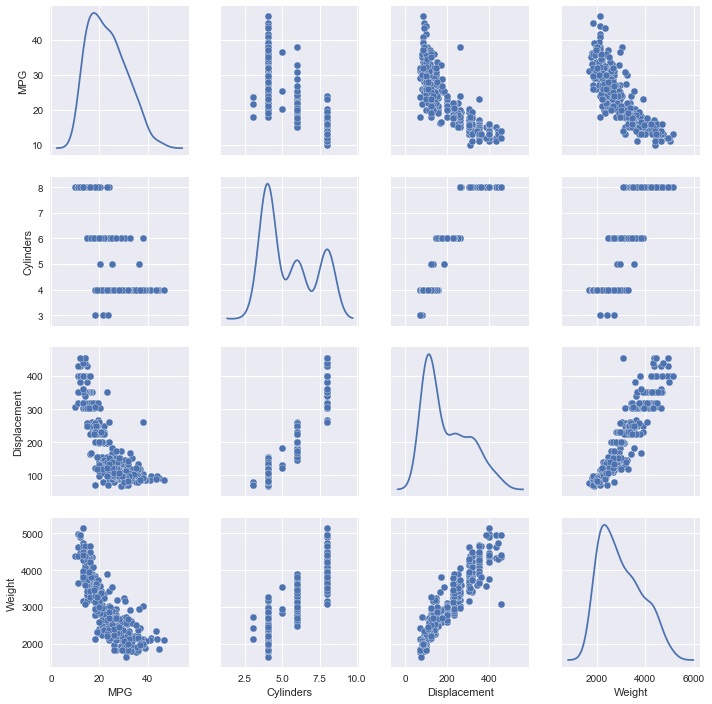

In [9]:
# Let's observe the distribution/correlation of features pair-wise

# Seaborn
plt.clf()
sns.pairplot(X_train[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind = 'kde')
# Note that the plots on the diagonal show the univariate distribution
# of the data for the variable in that column.
plt.show()

# Note about matplotlib:
# plt.cla()   # Clear axis
# plt.clf()   # Clear figure
# plt.close() # Close a figure window

In [10]:
# Display a description of the training set

X_train_stat = X_train.describe()
X_train_stat.pop('MPG')
X_train_stat = X_train_stat.transpose()
X_train_stat

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [11]:
# Let's separate the output from the input in the training/test sets

Y_train = X_train.pop('MPG')
Y_test = X_test.pop('MPG')

In [12]:
# Feature normalization

def feature_normalization(dataset):
    return (dataset - X_train_stat['mean'])/X_train_stat['std']

X_train = feature_normalization(X_train)
X_test = feature_normalization(X_test)

In [13]:
# Let's display the training set

X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852


In [14]:
### Build the model
# DENSE(64) -> RELU -> DENSE(64) -> RELU -> DENSE(1) 
# The output is a single continous value

def build_model(learning_rate = 0.001):
    ''' Create a Keras sequential model which consist of the following layers:
        DENSE(64) -> RELU -> DENSE(64) -> RELU -> DENSE(1) 
    '''
    
    # Define the layers
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # Define the optimization algorithm
    optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate) # Exponential average of the gradient norm
    # (Momentum: Exponential average of the gradient)
    
    # Map the model to an optimizer, a loss function and metrics
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    
    return model

In [15]:
# Create the model define above

model = build_model()
# Inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Let's try out the model on a small batch of training example
# But the model hasn't been trained,
# so the parameters used are the initial ones (random)

training_sample = X_train[:10]
predictions_sample = model.predict(training_sample)
predictions_sample
# We obtain the expected output shape

W0907 12:02:51.529467 140735803462528 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([[-0.191855  ],
       [-0.21284994],
       [ 0.15240908],
       [-0.21724333],
       [-0.2231221 ],
       [ 0.03627815],
       [-0.2598671 ],
       [-0.13080709],
       [ 0.01865678],
       [ 0.2794533 ]], dtype=float32)

In [17]:
# Now let's train the model

# (A callback is a set of functions to be applied at given stages of the training procedure.
# You can use callbacks to get a view on internal states and statistics of the model during training.
# You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method
# of the Sequential or Model classes.
# The relevant methods of the callbacks will then be called at each stage of the training.)

# keras.callbacks.Callback(): Abstract base class used to build new callbacks.

# First define a class and method to keep track of the training progress
class PrintDot(keras.callbacks.Callback):
    ''' Build a new callback to keep track of the training progress
    '''
    def on_epoch_end(self, epoch, logs):
        ''' Print a '.' at the end of the epoch
            epoch          epoch number (int)
        '''
        if (epoch % 100) == 0:
            print('')
        print('.', end='')
        
EPOCHS = 1000

# Train the model
history = model.fit(X_train,
          Y_train,
          epochs = EPOCHS, # batch_size = 32 by default
          validation_split= 0.2, #  20% split of the training set 
          verbose = 0,
          callbacks=[PrintDot()])


W0907 12:04:33.364866 140735803462528 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [18]:
# Let's visualize the model's training progress

# history.history is a dictionary
hist = pd.DataFrame(history.history)
print('History columns: ', list(hist.keys()))

# Add the epoch number to the history
hist['epoch'] = history.epoch
hist.tail()

History columns:  ['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error']


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.315055,0.970665,2.315055,8.409645,2.233683,8.409645,995
996,2.210541,0.918179,2.210541,8.682069,2.373355,8.682069,996
997,2.189200,0.935968,2.189200,8.597189,2.324378,8.597189,997
998,2.055421,0.873790,2.055421,8.532872,2.331979,8.532872,998
999,2.159771,0.908937,2.159771,8.763201,2.346807,8.763201,999


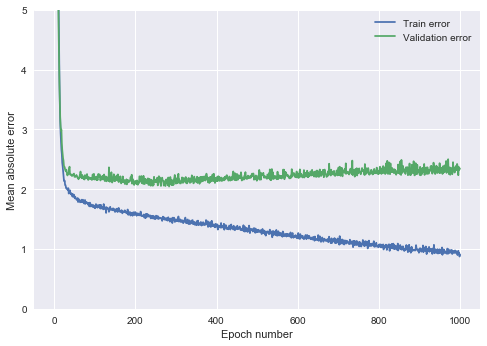

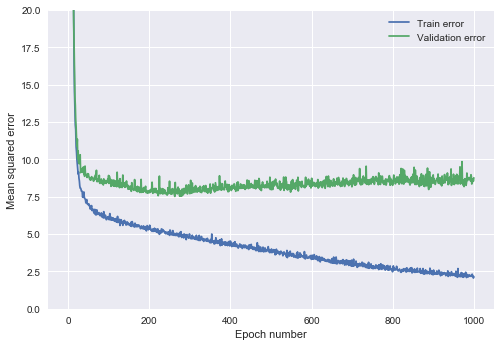

In [19]:
# Let's define a method to plot the loss/metrics history throughout learning

def plot_history(history):
    '''
    Plot: 1/ the mean absolute error of the training and test sets
          2/ the mean squared error of the training and test sets
    
    history          dictionary containing loss/metric history         
    '''
    # Work on a copy of the history (passed by reference)
    hist = pd.DataFrame(history)
    hist['epoch'] = history.epoch
    
    # Mean absolute error plot
    plt.figure()
    plt.xlabel('Epoch number')
    plt.ylabel('Mean absolute error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Validation error')
    plt.ylim([0, 5])
    plt.legend()
    
    # Mean squared error plot
    plt.figure()
    plt.xlabel('Epoch number')
    plt.ylabel('Mean squared error')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Validation error')
    plt.ylim([0, 20])
    plt.legend()
    
    # Display the figures
    plt.show()
    
plot_history(hist)
    

W0907 12:07:01.405107 140735803462528 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>



......................................................................

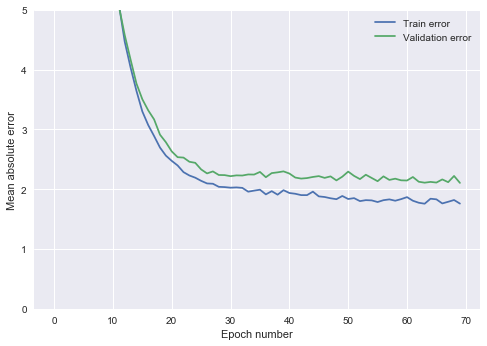

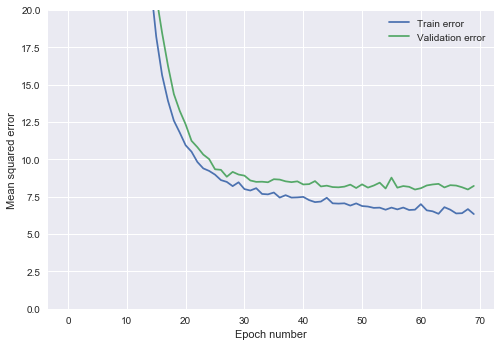

In [20]:
# Let's change the training step so that the learning stops 
# after no further improvement on the validation set: EarlyStopping
# If a set amount of epochs elapses without showing improvement,
# then automatically stop the training.

# BAD PRACTICE !! USE REGULARIZATION ! (orthogonalization)
# Address overfitting when DEFINING the cost function J(.)
# not when optimizing it.

# Construct another model
model = build_model()

# Stop training when a monitored quantity has stopped improving.
# The patience parameter is the amount of epochs to check for improvement
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train,
          Y_train,
          epochs = EPOCHS, # batch_size = 32 by default
          validation_split= 0.2, #  20% split of the training set 
          verbose = 0,
          callbacks=[early_stopping, PrintDot()])

# Plot the loss/metrics histories throught learning
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

In [21]:
# Let's see how the model generalizes by using the test set

loss, mean_absolute_error, mean_squared_error = model.evaluate(X_test, Y_test, verbose = 0)

print('TEST SET EVALUATION:')
print('LOSS: ', loss)
print('MAE: ', mean_absolute_error)
print('MSE: ', mean_squared_error)

W0907 12:07:29.981158 140735803462528 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


TEST SET EVALUATION:
LOSS:  6.07802136739095
MAE:  1.9956067
MSE:  6.0780215


W0907 12:07:56.832631 140735803462528 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


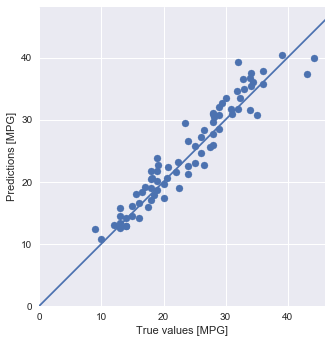

In [22]:
# Let's compute the predictions of the test set

test_predictions = model.predict(X_test).flatten()

# Let's compare the prediction with the actual predictions

plt.scatter(Y_test, test_predictions)
plt.xlabel('True values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal') # Make the xlim equal to the ylim
plt.axis('square') # Make the plot squarred
plt.xlim([0, plt.xlim()[1]]) 
plt.ylim([0, plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100]) # Add line in scatter plot, provide [x1, x2] and [y1, y2]
plt.show()

# The closer the point is to the y=x line, the better the prediction is.

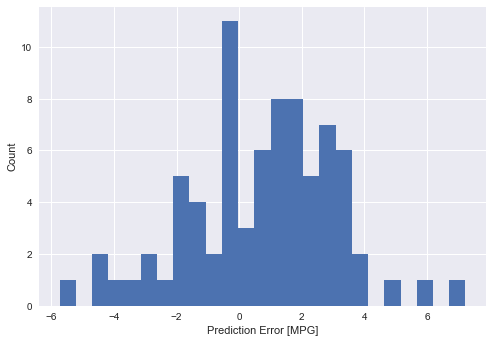

In [23]:
# Let's look at the error distribution

# Compute error
error = test_predictions - Y_test
# Plot a histogram
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')
plt.show()